In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
image_path = "/workspaces/Football-Analysis/output_video/player_1.png"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

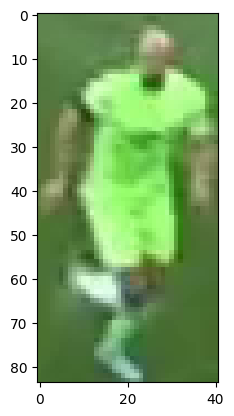

In [3]:
plt.imshow(image)
plt.show()

# Take only Upper Body


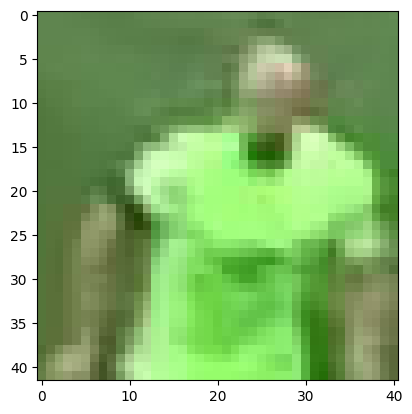

In [4]:
upper_body_image = image[0: int(image.shape[0] / 2), :]
plt.imshow(upper_body_image)
plt.show()

# Divide the Image into 2 Clusters

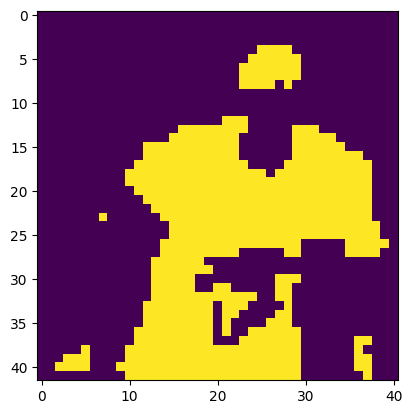

In [8]:
#Reshape image into 2d array of pixels
image_2d = upper_body_image.reshape(-1, 3)


#perform KMeans clustering with 2 clusters

kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2d)

#Get the labels of the image
labels = kmeans.labels_

#Reshape the labels to the original image shape
clustered_image = labels.reshape(upper_body_image.shape[0], upper_body_image.shape[1])

#Display the image
plt.imshow(clustered_image)
plt.show()

In [9]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

0


In [10]:
player_cluster = 1 if non_player_cluster == 0 else 0
player_cluster

1

In [11]:
kmeans.cluster_centers_[player_cluster]

array([158.3633157 , 230.23633157, 126.19753086])